In [114]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import joblib


In [115]:
#loading the dataset drug_consumption.data
data = pd.read_csv('drug_consumption.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [116]:
# Load the dataset
#df_cleaned = pd.read_csv('/content/drug_consumption_cleaned.csv')
columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df_cleaned = data
df_cleaned.columns = columns
df_cleaned.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [117]:
CL_MAPPING = {
      'CL0': 0.0, # 'never used the drug'
      'CL1': 1.0, # 'used it over a decade ago'
      'CL2': 2.0, # 'in the last decade'
      'CL3': 3.0, # 'used in the last year'
      'CL4': 4.0, # 'used in the last month'
      'CL5': 5.0, # 'used in the last week'
      'CL6': 6.0  # 'used in the last day'
}

In [118]:
#convert the drug consumption columns to numerical values
df_cleaned['Alcohol'] = df_cleaned['Alcohol'].map(CL_MAPPING)
df_cleaned['Amphet'] = df_cleaned['Amphet'].map(CL_MAPPING)
df_cleaned['Amyl'] = df_cleaned['Amyl'].map(CL_MAPPING)
df_cleaned['Benzos'] = df_cleaned['Benzos'].map(CL_MAPPING)
df_cleaned['Cannabis'] = df_cleaned['Cannabis'].map(CL_MAPPING)
df_cleaned['Coke'] = df_cleaned['Coke'].map(CL_MAPPING)
df_cleaned['Crack'] = df_cleaned['Crack'].map(CL_MAPPING)
df_cleaned['Ecstasy'] = df_cleaned['Ecstasy'].map(CL_MAPPING)
df_cleaned['Heroin'] = df_cleaned['Heroin'].map(CL_MAPPING)
df_cleaned['Ketamine'] = df_cleaned['Ketamine'].map(CL_MAPPING)
df_cleaned['Legalh'] = df_cleaned['Legalh'].map(CL_MAPPING)
df_cleaned['LSD'] = df_cleaned['LSD'].map(CL_MAPPING)
df_cleaned['Meth'] = df_cleaned['Meth'].map(CL_MAPPING)
df_cleaned['Mushrooms'] = df_cleaned['Mushrooms'].map(CL_MAPPING)
df_cleaned['Nicotine'] = df_cleaned['Nicotine'].map(CL_MAPPING)
df_cleaned['Semer'] = df_cleaned['Semer'].map(CL_MAPPING)
df_cleaned['VSA'] = df_cleaned['VSA'].map(CL_MAPPING)
df_cleaned['Choc'] = df_cleaned['Choc'].map(CL_MAPPING)
df_cleaned['Caff'] = df_cleaned['Caff'].map(CL_MAPPING)

#drop the ID column
df_cleaned = df_cleaned.drop('ID', axis=1)

In [119]:
df_cleaned.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0


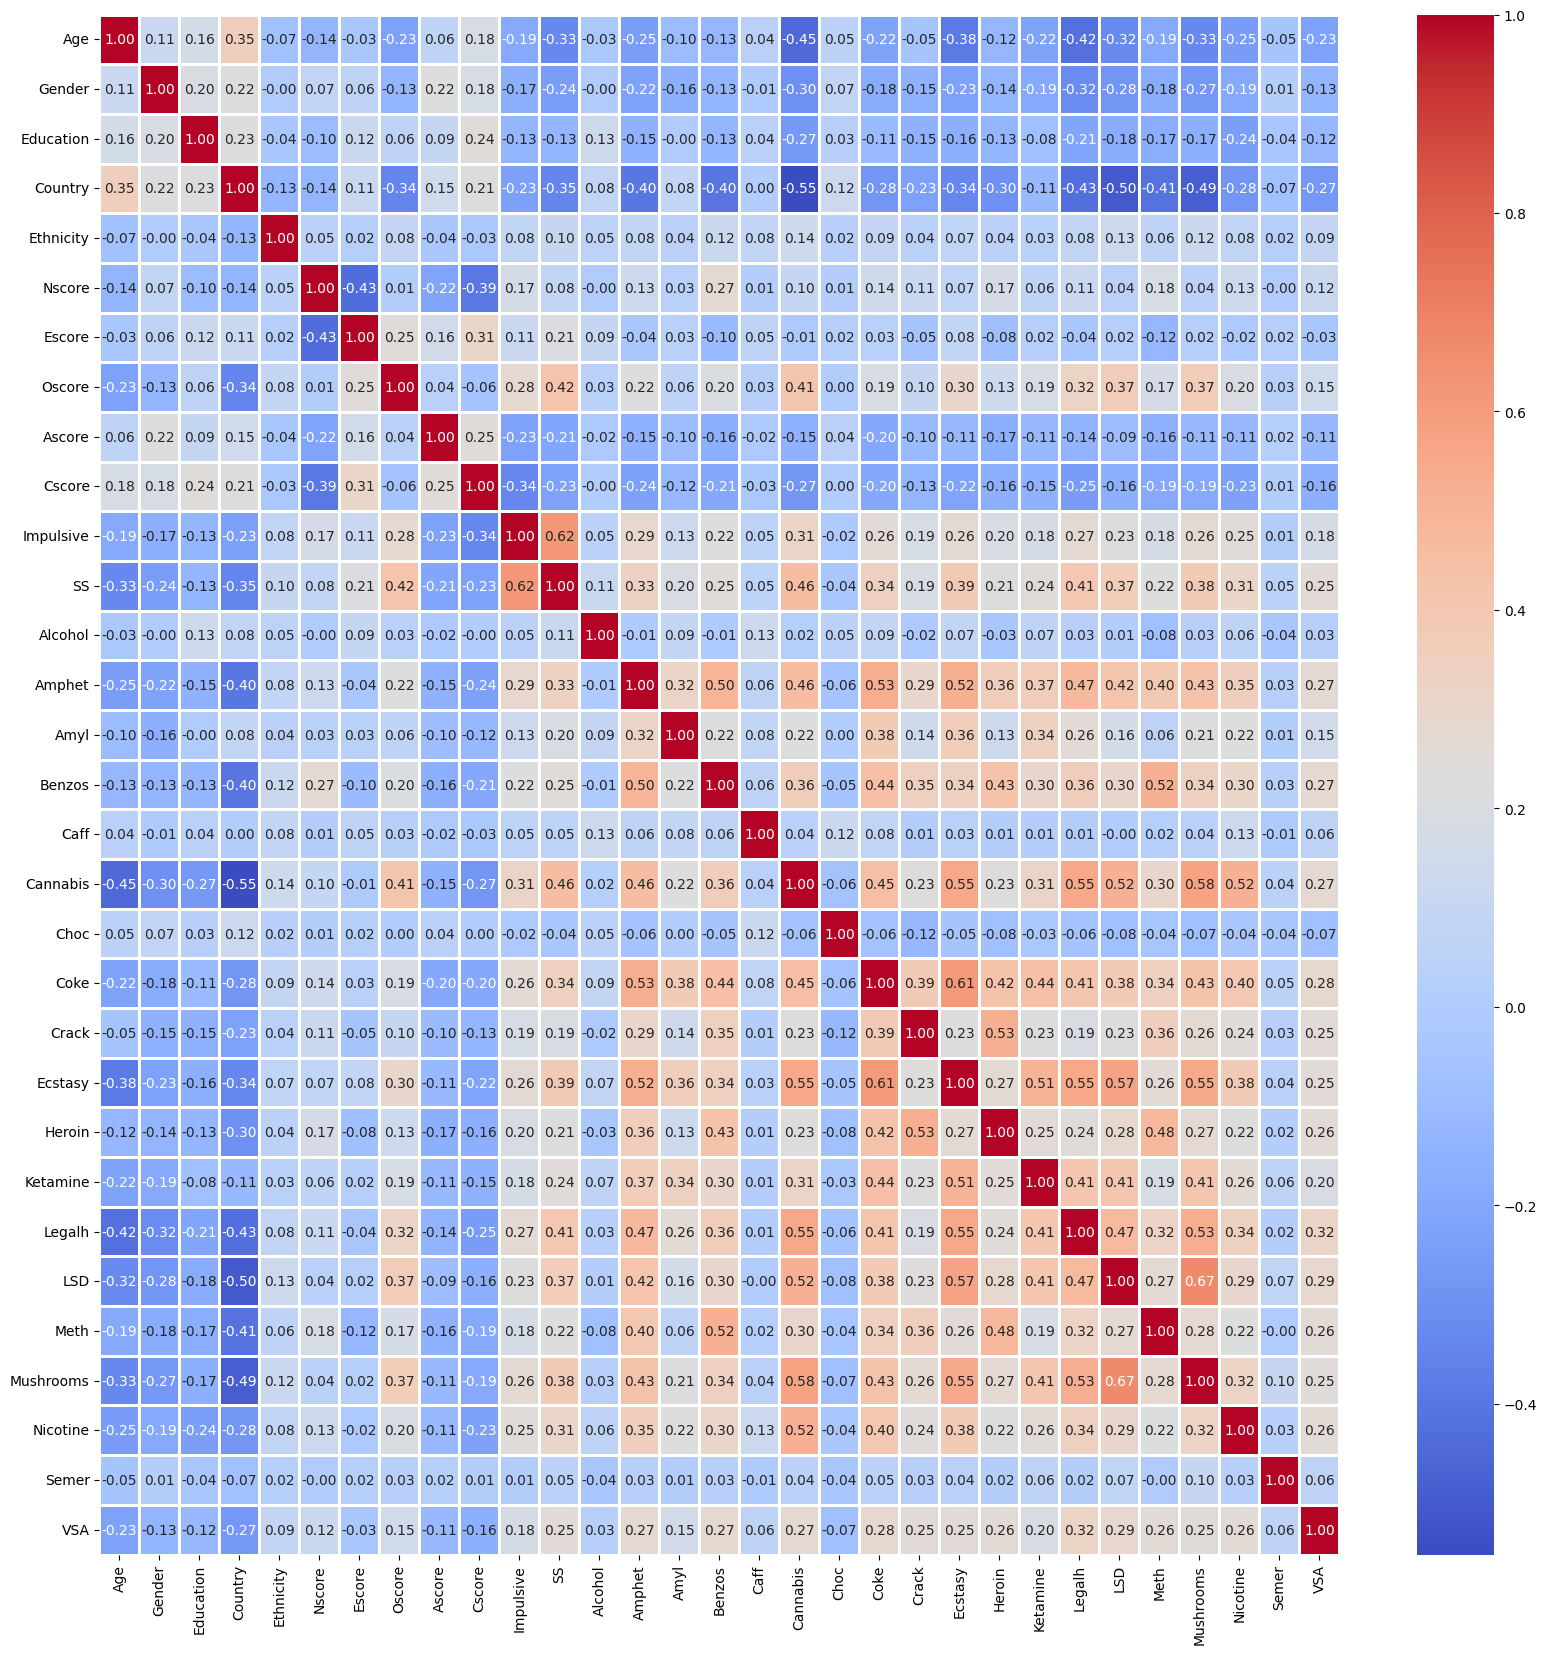

In [120]:
#calculate the correlation matrix
corr = df_cleaned.corr()

#plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [121]:
# defining the features and target variable

X = df_cleaned.drop(['Coke'], axis=1)
y = df_cleaned['Coke']

y.value_counts()


Coke
0.0    1038
2.0     270
3.0     258
1.0     160
4.0      99
5.0      41
6.0      19
Name: count, dtype: int64

In [122]:
# converting y values to binary
y = y.apply(lambda x: 1 if x > 0 else 0)
y.value_counts()

Coke
0    1038
1     847
Name: count, dtype: int64

In [123]:
#splitting the dataset into training and testing sets with StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1508, 30), (377, 30), (1508,), (377,))

In [211]:
# Deep Neural Network model
def create_deep_model(input_dim):
    deep_model = Sequential()
    deep_model.add(Dense(units=128, activation='relu', input_dim=input_dim))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(units=64, activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(units=16, activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(units=8, activation='relu'))
    deep_model.add(Dropout(0.5))
    deep_model.add(Dense(units=1, activation='sigmoid'))
    deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return deep_model

input_dim = X_train.shape[1]
deep_model = create_deep_model(input_dim)
deep_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 128)               3968      
                                                                 
 dropout_106 (Dropout)       (None, 128)               0         
                                                                 
 dense_167 (Dense)           (None, 64)                8256      
                                                                 
 dropout_107 (Dropout)       (None, 64)                0         
                                                                 
 dense_168 (Dense)           (None, 16)                1040      
                                                                 
 dropout_108 (Dropout)       (None, 16)                0         
                                                                 
 dense_169 (Dense)           (None, 8)               

Epoch 1/100
38/38 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.5116 - val_loss: 0.6917 - val_accuracy: 0.4934
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5381 - val_loss: 0.6662 - val_accuracy: 0.6623
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5912 - val_loss: 0.6226 - val_accuracy: 0.7185
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6012 - val_loss: 0.5921 - val_accuracy: 0.7815
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6434 - val_loss: 0.5616 - val_accuracy: 0.7914
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6310 - val_loss: 0.5447 - val_accuracy: 0.8046
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.6750 - val_loss: 0.5254 - val_accuracy: 0.7980
Epoch 8/100
3

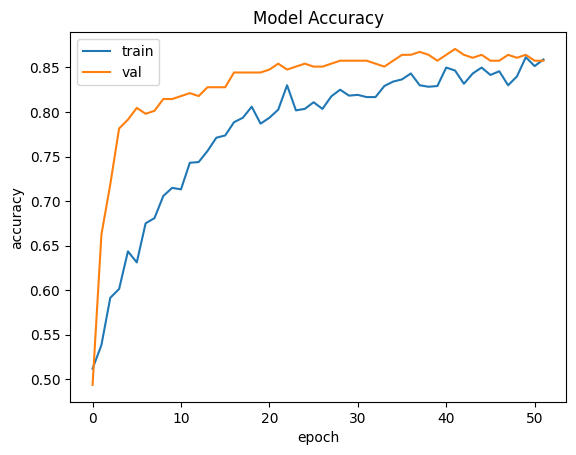

In [212]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


#adding the model the early stopping by validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
#saving the best model
model_checkpoint = ModelCheckpoint('Dnn_best_model_coke.h5', monitor='val_loss', mode='min', save_best_only=True)
#fitting the model
history = deep_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping, model_checkpoint])

#plotting the training and validation accuracy_score
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [213]:
from keras.models import load_model
#loading the best model
deep_best_model = load_model('Dnn_best_model_coke.h5')
#validating the model
y_pred = deep_best_model.predict(X_test)
y_pred = (y_pred > 0.5)
deep_loss, deep_accuracy = deep_best_model.evaluate(X_test, y_test)
print('Deep Model Accuracy:', deep_accuracy)
print('Deep Model Loss:', deep_loss)

joblib.dump()



12/12 [==============================] - 0s 727us/step - loss: 0.3882 - accuracy: 0.8117
Deep Model Accuracy: 0.8116710782051086
Deep Model Loss: 0.38824212551116943
